In [3]:
import numpy as np
import pandas as pd

In [5]:
crop = pd.read_csv('Crop_recommendation.csv')
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [7]:
crop.shape

(2200, 8)

In [9]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [11]:
crop.duplicated().sum()

0

In [13]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [15]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [17]:
crop1 = crop.iloc[:,0:6]
corr = crop1.corr()
corr

,N,P,K,temperature,humidity,ph
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000


<Axes: >

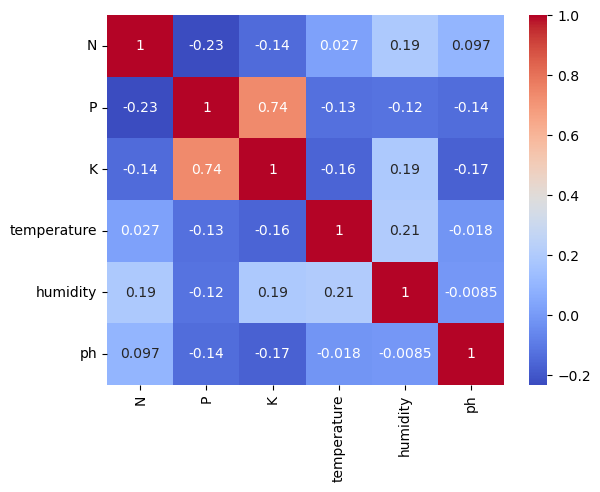

In [19]:
import seaborn as sns
sns.heatmap(corr,annot=True,cbar = True, cmap = 'coolwarm')

In [51]:
crop['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

C:\Users\Hii\AppData\Local\Temp\ipykernel_16960\2091051290.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop['N'])


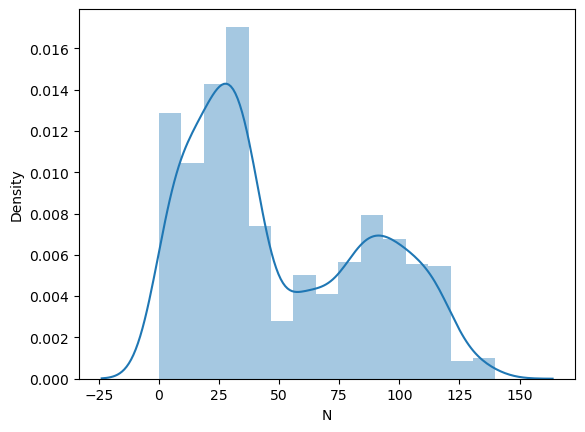

In [21]:
import matplotlib.pyplot as plt
sns.distplot(crop['N'])
plt.show()

In [77]:
label_dict = {
    'rice'          : 1,
    'maize'         : 2,
    'jute'          : 3,
    'cotton'        : 4,
    'coconut'       : 5,
    'papaya'        : 6,
    'orange'        : 7,
    'apple'         : 8,
    'muskmelon'     : 9,
    'watermelon'    : 10,
    'grapes'        : 11,
    'mango'         : 12,
    'banana'        : 13,
    'pomegranate'   : 14,
    'lentil'        : 15,
    'blackgram'     : 16,
    'mungbean'      : 17,
    'mothbeans'     : 18,
    'pigeonpeas'    : 19,
    'kidneybeans'   : 20,
    'chickpea'      : 21,
    'coffee'        : 22
}

crop['label_num'] = crop['label'].map(label_dict)
crop['label_num'].value_counts()

label_num
1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
20    100
21    100
22    100
Name: count, dtype: int64

In [79]:
crop

,N,P,K,temperature,humidity,ph,rainfall,label,label_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,22


In [83]:
crop.drop(['label'], axis=1,inplace=True)

In [86]:
crop

,N,P,K,temperature,humidity,ph,rainfall,label_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,22


In [90]:
X = crop.iloc[:,0:7]
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [92]:
y = crop['label_num']
y

0        1
1        1
2        1
3        1
4        1
        ..
2195    22
2196    22
2197    22
2198    22
2199    22
Name: label_num, Length: 2200, dtype: int64

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [98]:
from sklearn.preprocessing import MinMaxScaler

In [99]:
ms = MinMaxScaler()

In [100]:
X_train = ms.fit_transform(X_train)
X_test = ms.fit_transform(X_test)

In [101]:
X_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

In [103]:
X_test

array([[0.72142857, 0.08571429, 0.2020202 , ..., 0.94156508, 0.43357429,
        0.02211331],
       [0.7       , 0.02142857, 0.22222222, ..., 0.84553584, 0.4456159 ,
        0.10597679],
       [0.42142857, 0.40714286, 0.21212121, ..., 0.92544291, 0.55619767,
        0.34298924],
       ...,
       [0.86428571, 0.3       , 0.04545455, ..., 0.76097763, 0.68292227,
        0.18964149],
       [0.82857143, 0.33571429, 0.06060606, ..., 0.71506432, 0.42214144,
        0.16999146],
       [0.03571429, 0.45      , 0.06565657, ..., 0.22054288, 0.42329901,
        0.49021626]])

In [108]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [110]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [112]:
X_train

array([[-9.03426596e-01, -1.12616170e+00, -6.68506601e-01, ...,
         9.36586183e-01,  1.93473784e-01,  5.14970176e-03],
       [-3.67051340e-01,  7.70358846e-01, -5.70589522e-01, ...,
        -1.00470485e-01,  8.63917548e-01, -6.05290566e-01],
       [-1.17161422e+00,  5.89737842e-01, -4.53089028e-01, ...,
        -3.82774991e-01,  1.05029771e+00, -1.04580687e+00],
       ...,
       [-1.06433917e+00, -5.24091685e-01, -3.35588533e-01, ...,
        -8.98381379e-01, -6.34357580e-04, -4.37358211e-02],
       [-1.06433917e+00,  2.12501638e+00,  3.05234239e+00, ...,
         3.86340190e-01, -1.48467347e-01, -5.69036842e-01],
       [-5.01145154e-01,  7.40255346e-01, -5.11839275e-01, ...,
        -4.18045489e-01,  6.86860180e-01, -8.96531475e-01]])

In [114]:
X_test

array([[ 1.44233779, -1.13052957, -0.02454475, ...,  1.0157714 ,
        -0.33350426, -1.46473212],
       [ 1.3574717 , -1.4117947 ,  0.05727109, ...,  0.66193645,
        -0.23770082, -1.04330542],
       [ 0.25421252,  0.27579609,  0.01636317, ...,  0.95636671,
         0.64209145,  0.14771821],
       ...,
       [ 2.00811173, -0.19297913, -0.65861755, ...,  0.35036835,
         1.65031663, -0.62287754],
       [ 1.86666825, -0.03672073, -0.59725567, ...,  0.1811935 ,
        -0.42446437, -0.72162197],
       [-1.27337712,  0.46330617, -0.57680171, ..., -1.640949  ,
        -0.41525474,  0.88755633]])

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

models = {
    'Logistic Regression' : LogisticRegression(),
    'Naive Bayes' : GaussianNB(),
    'Support Vector Machine' : SVC(),
    'K-Nearest Neighbour' : KNeighborsClassifier(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Extra Tree' : ExtraTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'Bagging' : BaggingClassifier(),
    'ADA Boost' : AdaBoostClassifier(),
    'Gradient Boosting' : GradientBoostingClassifier()
}

for name, md in models.items():
    md.fit(X_train,y_train)
    y_pred = md.predict(X_test)

    print(f"{name} with accuracy: {accuracy_score(y_test,y_pred)}")

Logistic Regression with accuracy: 0.9545454545454546
Naive Bayes with accuracy: 0.9886363636363636
Support Vector Machine with accuracy: 0.9590909090909091
K-Nearest Neighbour with accuracy: 0.9431818181818182
Decision Tree with accuracy: 0.9477272727272728
Extra Tree with accuracy: 0.8522727272727273
Random Forest with accuracy: 0.9772727272727273
Bagging with accuracy: 0.9545454545454546


C:\Users\Hii\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


ADA Boost with accuracy: 0.1409090909090909
Gradient Boosting with accuracy: 0.9295454545454546


In [117]:
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)
accuracy_score(y_test,y_pred)*100

98.86363636363636

In [118]:
label_dict = {
                1 : 'rice',
                2 : 'maize',
                3 : 'jute',
                4 : 'cotton',
                5 : 'coconut',
                6 : 'papaya',
                7 : 'orange',
                8 : 'apple',
                9 : 'muskmelon',
                10 : 'watermelon',
                11 : 'grapes',
                12 : 'mango',
                13 : 'banana',
                14 : 'pomegranate',
                15 : 'lentil',
                16 : 'blackgram',
                17 : 'mungbean',
                18 : 'mothbeans',
                19 : 'pigeonpeas',
                20 : 'kidneybeans',
                21 : 'chickpea',
                22 : 'coffee'
}

In [119]:
def recommendation(N,P,K,temperature,humidity,ph,rainfall):
    features = np.array([[N,P,K,temperature,humidity,ph,rainfall]])
    prediction = nb.predict(features).reshape(1,-1)

    return prediction[0]

In [125]:
N = 1700
P = 10
K = 10
temperature	= 10.0
humidity = 10
ph = 10
rainfall = 15

predict = recommendation(N,P,K,temperature,humidity,ph,rainfall)

In [126]:
if predict[0] in label_dict:
    crop = label_dict[predict[0]]
    print("{} is a best crop to cultivate.".format(crop))
else:
    print("Sorry, Not Able to Recommend What to Cultivate")

watermelon is a best crop to cultivate.


In [127]:
import pickle 

In [128]:
pickle.dump(nb,open('recommendation_model.pkl','wb'))